___
# Atividade: Modelos probabilísticos contínuos e Dados
___

## Aula 14

**Preparo Prévio:**
1. Leitura prévia necessária: Magalhães e Lima (7ª. Edição): Modelo Normal (pág. 197 a 201).
2. Executar o arquivo `Distribuições Contínuas.ipynb`
3. Leitura prévia necessária: Magalhães e Lima (7ª. Edição): Gráfico de quantis ou QQplot (pág. 27 - Exemplo 1.10 e 1.11).
4. Leitura prévia necessária: Magalhães e Lima (7ª. Edição): Gráfico de probabilidade (similar ao gráfico QQplot) (pág. 201 a 204) - Exemplo 6.10).

**Hoje:**
1. Reforçar mais ferramentas para Análise Descritiva
2. Avaliar, descritivamente, adequação da normal aos dados.
3. Contrastar resultados teóricos e empíricos.


**Próxima aula:**
1.	Leitura prévia necessária: Magalhães e Lima (7ª. Edição): Seção 5.1 (pág. 137) e Seção 5.2 (pág. 146).
___

___
## <font color='blue'>Padaria </font>

Uma empresa deve decidir onde construir uma padaria: <font color='green'>Bairro A </font> ou <font color='orange'> Bairro B </font>. 

Como ambos os bairros possuem densidades populacionais próximas, os investidores visam atingir um público alvo de maior renda familiar. 
Assim, quanto maior o número de famílias com rendas familiares mais altas, maior será a chance do empreendimento ser bem sucedido. 

Considerando que a decisão final seja baseada em informações sobre a renda familiar dos moradores desses dois bairros, responda:

1. Calcule algumas medidas resumo úteis para entender o comportamento dessa variável em ambos os bairros. Analise.

2. Construa o histograma dos dados e compare as distribuições de renda familiar (em mil reais) dos dois bairros. Qual é o melhor bairro para construir a padaria? Justifique.

3. Construa o QQ-Plot considerando quantil amostral do Bairro A vs quantil amostral do Bairro B. Esse gráfico de quantis amostrais auxilia a responder qual é o melhor bairro para construir a padaria? Justifique claramente.
   Dica: veja construção desse gráfico no Magalhães e Lima (7ª edição) - pág. 27 e 29.

3. Assuma que $X$: renda familiar de um determinado bairro tenha $\mu$ estimada pela média amostral ($\bar{x}$) e tenha $\sigma^2$ estimada pela variância amostral, ambas de um mesmo bairro em questão. Verifique, visualmente/graficamente, se a distribuição normal é adequada para estimar a renda familiar de cada bairro. Para isso, interprete os seguintes gráficos:
      1. Construa o histograma dos dados junto com a fdp da distribuição normal e analise.
     
      2. Construa um gráfico dos valores observados vs frequência relativa acumulada (a partir dos dados) e vs função de distribuição acumulada.
      
      3. Construa o Gráfico de probabilidade considerando o quantil amostral vs o quantil teórico da distribuição normal. Interprete esse gráfico com intuito de avaliar se: A renda de cada bairro é bem modelada por uma distribuição normal?
      Dica: veja Exemplo 6.8 do Magalhães e Lima (7ª. edição) de como obter as frequências relativas acumuladas a partir de uma amostra de tamanho n=500 (de cada bairro). Os quantis teóricos da distribuição normal podem ser obtidos pelo comando `stats.norm.ppf(p, loc=mu, scale=sigma)`, sendo `p` a frequencia relativa acumulada  obtida anteriormente.   
   
4. Independente da sua resposta do item anterior, assuma que $X$: renda familiar de um determinado bairro segue uma distribuição normal considerando as estimativas amostrais como valores dos parâmetros de cada bairro. Nesse caso, para cada bairro, calcule:
      1. probabilidade de uma família possuir renda familiar maior do que 17 mil reais.

      2. sabendo que a famíliar tem mais do que 15 mil reais de renda familiar, qual a probabilidade dessa possuir renda inferior a 16 mil reais.
      
      3. qual a menor renda familiar dos 5% das famílias que mais ganham em cada bairro? 



In [10]:
%matplotlib inline

import os
import matplotlib.pyplot as plt
import pandas as pd
from scipy import stats
from numpy import mean, var, arange

print('Esperamos trabalhar no diretório')
print(os.getcwd())

pad = pd.read_excel('Padaria.xlsx')

Esperamos trabalhar no diretório
C:\Users\Kelly_2\Dropbox\Insper Aulas\DataScience DP\2017.1\aulas\Aula14 - Modelos probabilísticos contínuos com dados


In [11]:
pad.head()

,A,B
0,15.12024,15.09858
1,15.84624,16.31988
2,15.23992,13.07412
3,15.32792,16.06320
4,14.54736,16.13565


In [16]:
dO = pd.DataFrame()
dO['A']=sorted(pad.A)
dO['B']=sorted(pad.B)
dO.describe()

,A,B
count,500.000000,500.000000
mean,15.321676,14.221997
std,0.592599,1.840182
min,13.450880,9.704160
25%,14.919380,12.843832
50%,15.335840,14.348205
75%,15.702140,15.770295
max,17.151280,18.911520


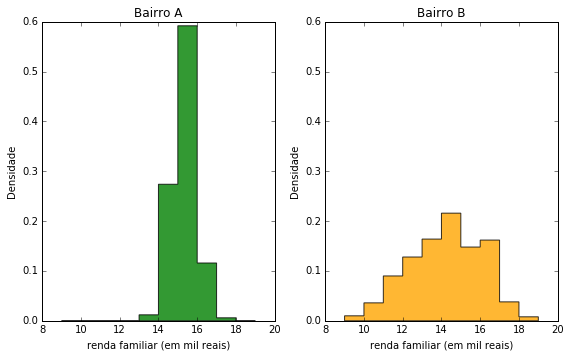

In [19]:
#item 2
faixa = arange(9,20,1)

f, (ax1,ax2) = plt.subplots(1,2, figsize=(8,5))

xA = sorted(pad.A)
ax1.hist(xA, bins=faixa, normed=1, histtype='stepfilled', color='green', alpha=0.8)
ax1.set_title('Bairro A')
ax1.set_xlabel('renda familiar (em mil reais)')
ax1.set_ylabel('Densidade')
ax1.set_ylim(0,0.6)

xB = sorted(pad.B)
ax2.hist(xB, bins=faixa, normed=1, histtype='stepfilled', color='orange', alpha=0.8)
ax2.set_title('Bairro B')
ax2.set_xlabel('renda familiar (em mil reais)')
ax2.set_ylabel('Densidade')
ax2.set_ylim(0,0.6)

plt.tight_layout(1)

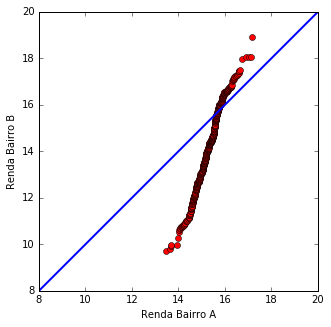

In [4]:
#item 3
#QQplot amostral bairro A vs amostral bairro B
plt.figure(figsize=(5, 5))
plt.plot(xA,xB,'ro')
plt.plot((8,20),(8,20), 'b-', lw=2)
plt.xlim(8,20)
plt.ylim(8,20)
plt.xlabel("Renda Bairro A")
plt.ylabel("Renda Bairro B")

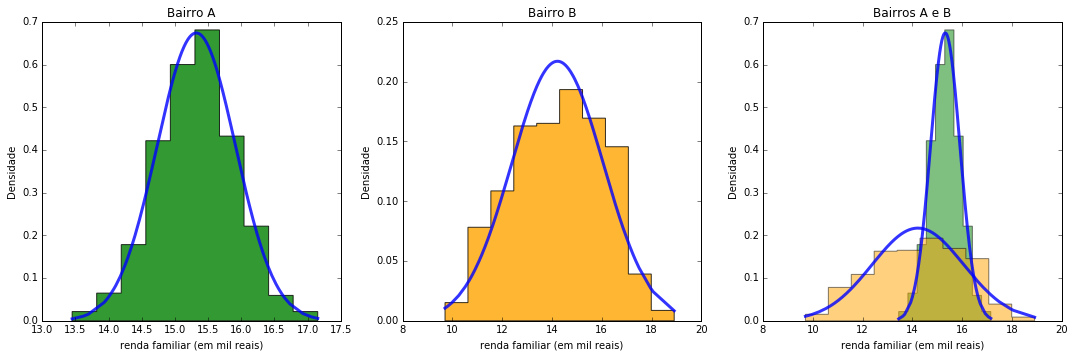

In [36]:
#item 4
#Distribuição Normal - fdp

f, (ax1,ax2,ax3) = plt.subplots(1,3, figsize=(15,5))

muhatA=mean(pad.A)
sigmahatA=var(pad.A)**(0.5)
xA = sorted(pad.A)
ax1.hist(xA, normed=1, histtype='stepfilled', color='green', alpha=0.8)
ax1.plot(xA, stats.norm.pdf(xA, loc=muhatA, scale=sigmahatA), 'b', lw=3, alpha=0.8)
ax1.set_title('Bairro A')
ax1.set_xlabel('renda familiar (em mil reais)')
ax1.set_ylabel('Densidade')
#ax1.set_ylim(0,0.7)
#ax1.set_xlim(8,20)

muhatB=mean(pad.B)
sigmahatB=var(pad.B)**(0.5)
xB = sorted(pad.B)
ax2.hist(xB, normed=1, histtype='stepfilled', color='orange', alpha=0.8)
ax2.plot(xB, stats.norm.pdf(xB, loc=muhatB, scale=sigmahatB), 'b', lw=3, alpha=0.8)
ax2.set_title('Bairro B')
ax2.set_xlabel('renda familiar (em mil reais)')
ax2.set_ylabel('Densidade')
#ax2.set_ylim(0,0.7)
#ax2.set_xlim(8,20)

#Dois juntos
ax3.hist(xA, normed=1, histtype='stepfilled', color='green', alpha=0.5)
ax3.plot(xA, stats.norm.pdf(xA, loc=muhatA, scale=sigmahatA), 'b', lw=3, alpha=0.8)
ax3.set_title('Bairro A')
ax3.set_xlabel('renda familiar (em mil reais)')
ax3.set_ylabel('Densidade')
ax3.hist(xB, normed=1, histtype='stepfilled', color='orange', alpha=0.5)
ax3.plot(xB, stats.norm.pdf(xB, loc=muhatB, scale=sigmahatB), 'b', lw=3, alpha=0.8)
ax3.set_title('Bairros A e B')
ax3.set_xlabel('renda familiar (em mil reais)')
ax2.set_ylabel('Densidade')
ax3.set_ylim(0,0.7)
ax3.set_xlim(8,20)

plt.tight_layout(1)

In [6]:
len(pad)

500

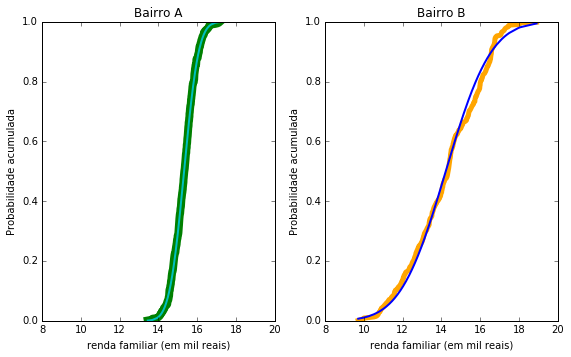

In [29]:
#item 4
#fra e cdf

#Frequencia relativa acumulada
fra = []
for i in range(len(pad)):
    fra.append((i+0.5)/len(pad))

cdfA = [] #cdf
for x in xA:
    cdfA.append(stats.norm.cdf(x, loc=muhatA, scale=sigmahatA))

cdfB = []
for x in xB:
    cdfB.append(stats.norm.cdf(x, loc=muhatB, scale=sigmahatB))

f, (ax1,ax2) = plt.subplots(1,2, figsize=(8,5))

ax1.plot(xA, fra, 'g-', lw=8)
ax1.plot(xA, cdfA, 'c-', lw=2)
ax1.set_title('Bairro A')
ax1.set_xlabel('renda familiar (em mil reais)')
ax1.set_ylabel('Probabilidade acumulada')
ax1.set_xlim(8,20)

ax2.plot(xB, fra, '-', color='orange', lw=5)
ax2.plot(xB, cdfB, 'b-', lw=2)
ax2.set_title('Bairro B')
ax2.set_xlabel('renda familiar (em mil reais)')
ax2.set_ylabel('Probabilidade acumulada')
ax2.set_xlim(8,20)

plt.tight_layout(1)

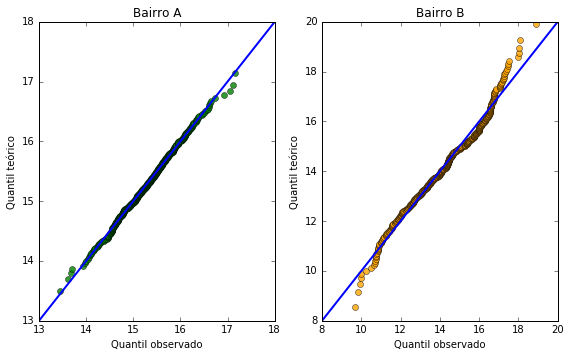

In [7]:
#item 4
#QQplot amostral vs teórico

qtA = [] #quantil teórico
qtB = []
for p in fra:
    qtA.append(stats.norm.ppf(p, loc=muhatA, scale=sigmahatA))
    qtB.append(stats.norm.ppf(p, loc=muhatB, scale=sigmahatB))    
    
f, (ax1,ax2) = plt.subplots(1,2, figsize=(8,5))

ax1.plot(xA, qtA, 'go', lw=3, alpha=0.8)
ax1.plot((13,18),(13,18), 'b-', lw=2)
ax1.set_title('Bairro A')
ax1.set_xlabel('Quantil observado')
ax1.set_ylabel('Quantil teórico')

ax2.plot(xB, qtB, 'o', color = 'orange', lw=3, alpha=0.8)
ax2.plot((8,20),(8,20), 'b-', lw=2)
ax2.set_title('Bairro B')
ax2.set_xlabel('Quantil observado')
ax2.set_ylabel('Quantil teórico')

plt.tight_layout(1)

In [9]:
#item 5
print('Bairro A:')
print('Probabilidade de uma família possuir renda familiar maior do que 17 mil reais:',
      (1-stats.norm.cdf(17, loc=muhatA, scale=sigmahatA)))
print('Sabendo que a famíliar tem mais do que 15 mil reais de renda familiar, probabilidade dessa possuir renda inferior a 16 mil reais:',
      ((stats.norm.cdf(16, loc=muhatA, scale=sigmahatA)-stats.norm.cdf(15, loc=muhatA, scale=sigmahatA))/(1-stats.norm.cdf(15, loc=muhatA, scale=sigmahatA))))
print('Qual a menor renda familiar dos 5% das famílias que mais ganham em cada bairro?', 
      (stats.norm.ppf(.95, loc=muhatA, scale=sigmahatA)))
print(' ')
print('Bairro B:')
print('Probabilidade de uma família possuir renda familiar maior do que 17 mil reais:',
      (1-stats.norm.cdf(17, loc=muhatB, scale=sigmahatB)))
print('Sabendo que a famíliar tem mais do que 15 mil reais de renda familiar, probabilidade dessa possuir renda inferior a 16 mil reais:',
      ((stats.norm.cdf(16, loc=muhatB, scale=sigmahatB)-stats.norm.cdf(15, loc=muhatB, scale=sigmahatB))/(1-stats.norm.cdf(15, loc=muhatB, scale=sigmahatB))))
print('Qual a menor renda familiar dos 5% das famílias que mais ganham em cada bairro?', 
      (stats.norm.ppf(.95, loc=muhatB, scale=sigmahatB)))


Bairro A:
Probabilidade de uma família possuir renda familiar maior do que 17 mil reais: 0.00229143073584
Sabendo que a famíliar tem mais do que 15 mil reais de renda familiar, probabilidade dessa possuir renda inferior a 16 mil reais: 0.821759884831
Qual a menor renda familiar dos 5% das famílias que mais ganham em cada bairro? 16.2954384799
 
Bairro B:
Probabilidade de uma família possuir renda familiar maior do que 17 mil reais: 0.0653755121208
Sabendo que a famíliar tem mais do que 15 mil reais de renda familiar, probabilidade dessa possuir renda inferior a 16 mil reais: 0.503892441482
Qual a menor renda familiar dos 5% das famílias que mais ganham em cada bairro? 17.245798495
